# Analysis of the dataset

### Importing libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from wordcloud import WordCloud

### Loading the datasets

In [ ]:
train_data = pd.read_csv('train_medical.csv')
test_data = pd.read_csv('test_medical.csv')
validation_data = pd.read_csv('validation_medical.csv')

In [3]:
print("Shape of the training set : " , train_data.shape)
print("Shape of the test set : " , test_data.shape)
print("Shape of the validation set : " , validation_data.shape)

Shape of the training set :  (13340, 25)
Shape of the test set :  (4566, 25)
Shape of the validation set :  (4270, 25)


In [4]:
train_data.head()

,_unit_id,_created_at,_canary,_id,_started_at,_channel,_trust,_worker_id,_country,_region,...,direction_gold,e1,e2,relation,relex_relcos,sent_id,sentence,term1,term2,twrex
0,502808352,7/13/2014 13:48:35,NaN,1321892767,7/13/2014 13:48:14,clixsense,0.9167,27871219,NLD,07,...,NaN,69,142,treats,1.0,907845-FS1-2,"For treatment of uncomplicated cervical, URETH...",URETHRAL OR RECTAL GONORRHEA,IM CEFTRIAXONE,RO-may_treat
1,502808352,7/13/2014 13:51:12,NaN,1321894040,7/13/2014 13:51:07,neodev,0.8333,17610000,GBR,I2,...,NaN,69,142,treats,1.0,907845-FS1-2,"For treatment of uncomplicated cervical, URETH...",URETHRAL OR RECTAL GONORRHEA,IM CEFTRIAXONE,RO-may_treat
2,502808352,7/13/2014 16:24:57,NaN,1321961909,7/13/2014 16:24:35,instagc,0.6639,25990856,USA,NV,...,NaN,69,142,treats,1.0,907845-FS1-2,"For treatment of uncomplicated cervical, URETH...",URETHRAL OR RECTAL GONORRHEA,IM CEFTRIAXONE,RO-may_treat
3,502808352,7/13/2014 16:33:49,NaN,1321965723,7/13/2014 16:33:31,elite,0.3923,28276268,USA,CA,...,NaN,69,142,treats,1.0,907845-FS1-2,"For treatment of uncomplicated cervical, URETH...",URETHRAL OR RECTAL GONORRHEA,IM CEFTRIAXONE,RO-may_treat
4,502808352,7/13/2014 16:47:27,NaN,1321970904,7/13/2014 16:47:06,neodev,0.6552,27597779,CAN,AB,...,NaN,69,142,treats,1.0,907845-FS1-2,"For treatment of uncomplicated cervical, URETH...",URETHRAL OR RECTAL GONORRHEA,IM CEFTRIAXONE,RO-may_treat


## Dropping irrelevant columns

In [5]:
#dropping irrelevant columns
columns_to_drop = ['_unit_id', '_created_at', '_canary', '_id', '_started_at', '_channel',
       '_trust', '_worker_id', '_country', '_region', '_city', '_ip',
       'direction', 'b1', 'b2', 'direction_gold', 'e1', 'e2',
       'relex_relcos', 'sent_id', 'twrex', 'term1' , 'term2']


train_data = train_data.drop( columns_to_drop , axis = 1)
test_data = test_data.drop(columns_to_drop , axis = 1)
validation_data = validation_data.drop(columns_to_drop , axis = 1)


print("Shape of training set : " , train_data.shape)
print("Shape of test set : " , test_data.shape)
print("Shape of validation set : " , validation_data.shape)

Shape of training set :  (13340, 2)
Shape of test set :  (4566, 2)
Shape of validation set :  (4270, 2)


### Distribution Of classes

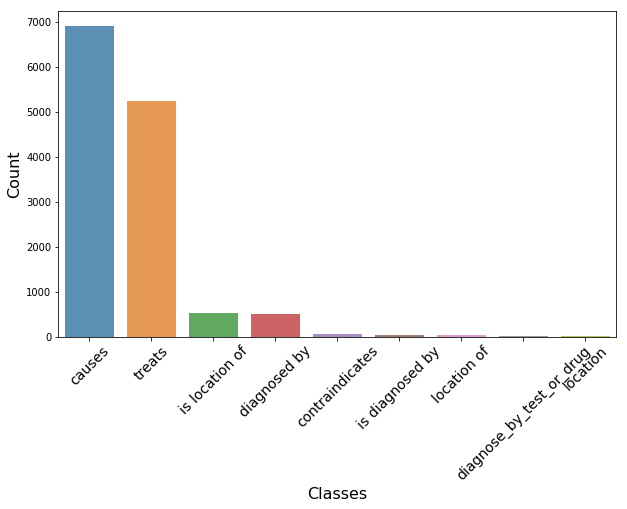

In [6]:
count_classes = train_data['relation'].value_counts()
x = [ i for i in range( len(count_classes.index) )]

plt.figure(figsize = ( 10 , 6 ) )
sns.barplot(count_classes.index , count_classes.values , alpha = 0.8)
plt.ylabel('Count' , fontsize = 16 )
plt.xlabel('Classes' , fontsize = 16 )
plt.xticks( x , count_classes.index , fontsize = 14 , rotation = 45)
plt.show()

In [7]:
train_data.loc[train_data.relation == 'is location of' , 'relation'] = 'Others'
train_data.loc[train_data.relation == 'diagnosed by' , 'relation'] = 'Others'
train_data.loc[train_data.relation == 'contraindicates' , 'relation'] = 'Others'
train_data.loc[train_data.relation == 'location' , 'relation'] = 'Others'
train_data.loc[train_data.relation == 'location of' , 'relation'] = 'Others'
train_data.loc[train_data.relation == 'diagnose_by_test_or_drug' , 'relation'] = 'Others'
train_data.loc[train_data.relation == 'is diagnosed by' , 'relation'] = 'Others'

test_data.loc[test_data.relation == 'is location of' , 'relation'] = 'Others'
test_data.loc[test_data.relation == 'diagnosed by' , 'relation'] = 'Others'
test_data.loc[test_data.relation == 'contraindicates' , 'relation'] = 'Others'
test_data.loc[test_data.relation == 'location' , 'relation'] = 'Others'
test_data.loc[test_data.relation == 'location of' , 'relation'] = 'Others'
test_data.loc[test_data.relation == 'diagnose_by_test_or_drug' , 'relation'] = 'Others'
test_data.loc[test_data.relation == 'is diagnosed by' , 'relation'] = 'Others'

validation_data.loc[validation_data.relation == 'is location of' , 'relation'] = 'Others'
validation_data.loc[validation_data.relation == 'diagnosed by' , 'relation'] = 'Others'
validation_data.loc[validation_data.relation == 'contraindicates' , 'relation'] = 'Others'
validation_data.loc[validation_data.relation == 'location' , 'relation'] = 'Others'
validation_data.loc[validation_data.relation == 'location of' , 'relation'] = 'Others'
validation_data.loc[validation_data.relation == 'diagnose_by_test_or_drug' , 'relation'] = 'Others'
validation_data.loc[validation_data.relation == 'is diagnosed by' , 'relation'] = 'Others'

### Number of unique sentences 

In [8]:
print("Unique sentences in training set : ")
print(len(train_data.sentence.unique()))
print("Unique sentences in test set : ")
print(len(test_data.sentence.unique()))
print("Unique sentences in validation set : ")
print(len(validation_data.sentence.unique()))


Unique sentences in training set : 
1618
Unique sentences in test set : 
590
Unique sentences in validation set : 
584


In [9]:
print("Total unique sentences : " , 1618+590+584)

Total unique sentences :  2792


## Distribution of sentences belonging to each class

#### Training set

In [10]:
x = pd.get_dummies(train_data.relation)

In [11]:
# Here is the total number of samples belongs to each class
y = x.iloc[:,:].sum()
print('total number of sentences :',len(x))
print("Samples belonging to each class" )
print(y)

total number of sentences : 13340
Samples belonging to each class
Others    1194
causes    6908
treats    5238
dtype: int64


#### Test set

In [12]:
x = pd.get_dummies(test_data.relation)
# Here is the total number of samples belongs to each class
y = x.iloc[:,:].sum()
print('total number of sentences :',len(x))
print("Samples belonging to each class" )
print(y)

total number of sentences : 4566
Samples belonging to each class
Others     548
causes    2338
treats    1680
dtype: int64


#### Validation set

In [13]:
x = pd.get_dummies(validation_data.relation)
# Here is the total number of samples belongs to each class
y = x.iloc[:,:].sum()
print('total number of sentences :',len(x))
print("Samples belonging to each class" )
print(y)

total number of sentences : 4270
Samples belonging to each class
Others     447
causes    2025
treats    1798
dtype: int64


# Word cloud

#### For training set


In [15]:
import re
import numpy as np

wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')

def text_prepare(doc):
    
    doc = REPLACE_BY_SPACE_RE.sub(' ' , doc)
    doc = doc.strip()
    # tokenize document
    tokens = wpt.tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

In [16]:
relation_list = ['causes' , 'treats' , 'Others']

Causes = train_data[train_data['relation'] == 'causes']
Causes = [ text_prepare(x) for x in Causes['sentence']]

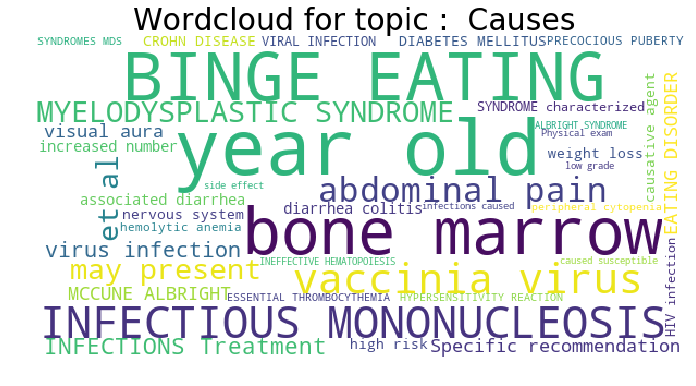

In [17]:
wordcloud = WordCloud(background_color='white', width=600, height=300, max_font_size=70, max_words=40).generate(str(Causes))
wordcloud.recolor(random_state = 312)
plt.figure(figsize = ( 16 , 6))
plt.imshow(wordcloud)
plt.title("Wordcloud for topic :  Causes " , fontsize = 30 )
plt.axis("off")
plt.show()


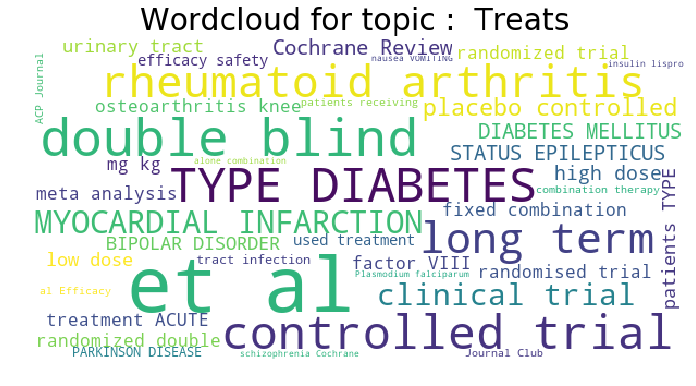

In [18]:
relation_list = ['causes' , 'treats' , 'Others']

Causes = train_data[train_data['relation'] == 'treats']
Causes = [ text_prepare(x) for x in Causes['sentence']]

wordcloud = WordCloud(background_color='white', width=600, height=300, max_font_size=70, max_words=40).generate(str(Causes))
wordcloud.recolor(random_state = 312)
plt.figure(figsize = ( 16 , 6))
plt.imshow(wordcloud)
plt.title("Wordcloud for topic :  Treats " , fontsize = 30 )
plt.axis("off")
plt.show()

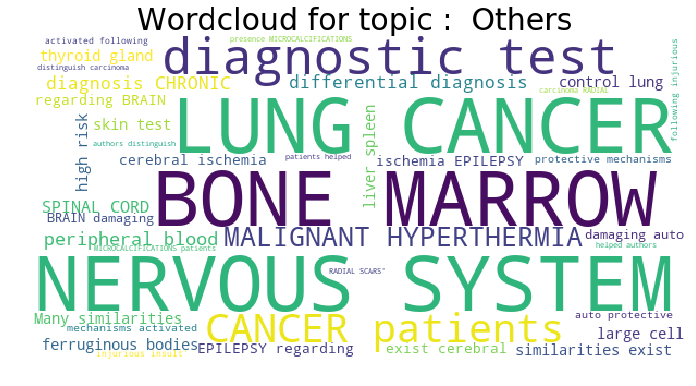

In [58]:
relation_list = ['causes' , 'treats' , 'Others']
Causes = train_data[train_data['relation'] == 'Others']
Causes = [ text_prepare(x) for x in Causes['sentence']]

wordcloud = WordCloud(background_color='white', width=600, height=300, max_font_size=70, max_words=40).generate(str(Causes))
wordcloud.recolor(random_state = 312)
plt.figure(figsize = ( 16 , 6))
plt.imshow(wordcloud)
plt.title("Wordcloud for topic :  Others " , fontsize = 30 )
plt.axis("off")
plt.show()